# Welcome to HLML first hands on session
## In this tutorial I'm gonna show how to do clustering and dimensionality reduction

### Plan:
**Dimensionality reduction tools:**
- PCA
- MDS
- t-SNE
- UMAP
- Autoencoder NN

**Clustering Algorithms:**
- K-Means
- Hierarchical Clustering

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, MDS
from matplotlib.pyplot import imshow
import umap
from sklearn.cluster import KMeans, AgglomerativeClustering

## Load MNIST Data

In [30]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [31]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

## Take only one thousand data points

In [32]:
X = x_test[:1000]
Y = y_test[:1000]

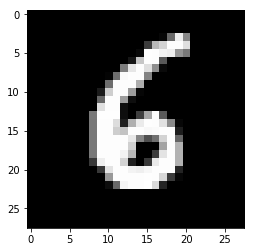

In [33]:
imshow(X[986], cmap='gray')

In [34]:
X[123]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0, 216, 254,  26,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  25, 155, 253, 116,   1,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          6, 216, 254, 254,  17,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        136, 254, 238,  62,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

## We want to convert each data point  to a vector which dimensionality is 28x28 = 784

In [35]:
X = X.reshape(1000, 784)

In [36]:
X[123]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0, 216, 254,  26,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  25, 155, 253, 116,   1,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   6, 216, 254, 254,  17,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 136, 254, 238,
        62,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  7

## Data loading and preparation is over. Let's have some fun

### PCA

In [37]:
pca_2 = PCA(n_components = 2).fit(X)
# you can also use PCA(0.95) to find number components that have variance 95%

In [38]:
pca = pca_2.transform(X)
pca_2.explained_variance_ratio_

array([0.1003825 , 0.07777415])

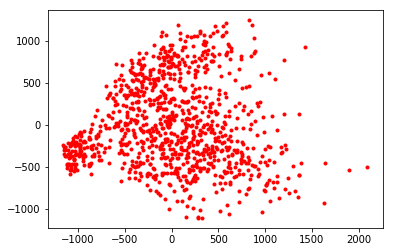

In [39]:
plt.scatter(pca[:,0], pca[:,1], marker='.', color='red')

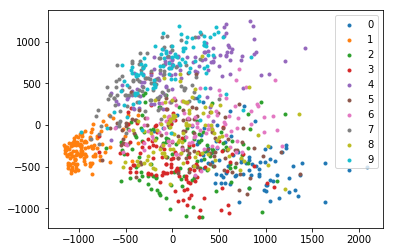

In [40]:
for label in set(Y):
	mask = Y==label
	plt.scatter(pca[:,0][mask], pca[:,1][mask], marker = '.', label = label)   #, color =  label + 1) #, label = str(label))
plt.legend()

# t-SNE

In [41]:
tsne = TSNE(n_components=2, verbose=1).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.012s...
[t-SNE] Computed neighbors for 1000 samples in 1.261s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 502.251680
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.783905
[t-SNE] Error after 1000 iterations: 1.065920


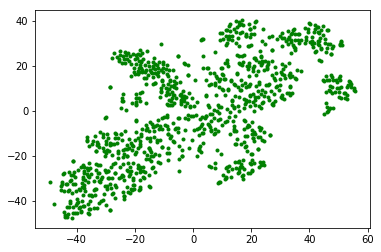

In [42]:
plt.scatter(tsne[:,0], tsne[:,1], marker='.', color='green')

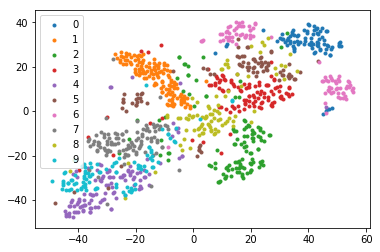

In [43]:
for label in set(Y):
	mask = Y==label
	plt.scatter(tsne[:,0][mask], tsne[:,1][mask], marker = '.', label = label)   #, color =  label + 1) #, label = str(label))
plt.legend()

# MDS

In [44]:
mds = MDS(n_components=2, max_iter = 300, verbose = 2).fit_transform(X)

it: 0, stress 3249381047749.453
it: 1, stress 604215552076.9884
it: 2, stress 579066558831.0963
it: 3, stress 560638894111.2369
it: 4, stress 547149866825.28467
it: 5, stress 536987727748.299
it: 6, stress 529346981549.1531
it: 7, stress 523607350158.256
it: 8, stress 519235989194.301
it: 9, stress 515734229029.8412
it: 10, stress 512772253421.1001
it: 11, stress 510236124079.8119
it: 12, stress 508091494301.6052
it: 13, stress 506286257637.6603
it: 14, stress 504789108000.54614
it: 15, stress 503558089557.55084
it: 16, stress 502534530478.2352
it: 17, stress 501677353087.87775
it: 18, stress 500959603370.0666
it: 19, stress 500353349237.6383
it: 20, stress 499828238565.57104
it: 21, stress 499361191288.2171
it: 22, stress 498937854506.2155
it: 23, stress 498548906587.8039
it: 24, stress 498179196004.0259
it: 25, stress 497824173751.40027
it: 26, stress 497478165565.6885
it: 27, stress 497133649169.4774
it: 28, stress 496786255047.2181
it: 29, stress 496431892996.1375
it: 30, stress 49

it: 246, stress 428570582269.214
it: 247, stress 428481738452.982
it: 248, stress 428396086725.4573
it: 249, stress 428312394974.51044
it: 250, stress 428230650737.7301
it: 251, stress 428151082662.9897
it: 252, stress 428073433781.126
it: 253, stress 427998289553.1105
it: 254, stress 427925454948.35834
it: 255, stress 427854244036.294
it: 256, stress 427785183774.776
it: 257, stress 427717081556.1741
it: 258, stress 427649562136.9975
it: 259, stress 427582662846.6457
it: 260, stress 427515305221.464
it: 261, stress 427447200820.823
it: 262, stress 427379390492.97015
it: 263, stress 427312663274.0245
it: 264, stress 427247317382.85614
it: 265, stress 427183492859.2164
it: 266, stress 427120204288.8319
it: 267, stress 427057393455.25256
it: 268, stress 426994351112.17993
it: 269, stress 426930818811.4585
it: 270, stress 426868609332.2869
it: 271, stress 426807902483.82526
it: 272, stress 426748310687.0222
it: 273, stress 426688823876.1576
it: 274, stress 426629570919.0422
it: 275, stres

it: 191, stress 445874557889.29663
it: 192, stress 445467164941.01917
it: 193, stress 445064233809.7314
it: 194, stress 444666430260.41406
it: 195, stress 444276216280.8664
it: 196, stress 443891703486.7624
it: 197, stress 443508875931.4017
it: 198, stress 443129431773.5246
it: 199, stress 442754060716.8024
it: 200, stress 442384090997.4687
it: 201, stress 442018721646.73364
it: 202, stress 441660013028.86926
it: 203, stress 441306738777.74866
it: 204, stress 440957522155.0806
it: 205, stress 440610314379.7719
it: 206, stress 440266949615.3906
it: 207, stress 439927271848.21985
it: 208, stress 439585692585.80896
it: 209, stress 439246667892.65326
it: 210, stress 438911106908.9462
it: 211, stress 438575960546.71985
it: 212, stress 438242972349.72504
it: 213, stress 437914080306.1197
it: 214, stress 437587331373.1334
it: 215, stress 437260873626.6565
it: 216, stress 436935500485.43195
it: 217, stress 436612763641.2571
it: 218, stress 436296204594.09796
it: 219, stress 435987754129.59534


it: 133, stress 465525800401.00684
it: 134, stress 464946588509.2505
it: 135, stress 464367442855.1618
it: 136, stress 463790264948.85803
it: 137, stress 463215895952.80554
it: 138, stress 462644906395.98596
it: 139, stress 462080376808.4565
it: 140, stress 461522676816.583
it: 141, stress 460972647332.0751
it: 142, stress 460420745613.08057
it: 143, stress 459876267068.46844
it: 144, stress 459340624552.90125
it: 145, stress 458810931269.7115
it: 146, stress 458295534397.35
it: 147, stress 457791880228.0397
it: 148, stress 457297517758.2021
it: 149, stress 456809895637.8834
it: 150, stress 456326020815.6338
it: 151, stress 455842665694.3391
it: 152, stress 455368645372.1505
it: 153, stress 454906517778.6654
it: 154, stress 454455706920.1489
it: 155, stress 454017392610.44525
it: 156, stress 453588894776.165
it: 157, stress 453166859692.7716
it: 158, stress 452746359961.2121
it: 159, stress 452327149382.79724
it: 160, stress 451908572691.2734
it: 161, stress 451489122934.80396
it: 162,

it: 79, stress 487961572750.6644
it: 80, stress 487558243018.1197
it: 81, stress 487149474986.20294
it: 82, stress 486734632916.62805
it: 83, stress 486313499271.25085
it: 84, stress 485885663073.8323
it: 85, stress 485451831497.9523
it: 86, stress 485013154263.63727
it: 87, stress 484569369151.2202
it: 88, stress 484122137698.1414
it: 89, stress 483669387166.4274
it: 90, stress 483208587245.72485
it: 91, stress 482739346412.3252
it: 92, stress 482261911157.1691
it: 93, stress 481777981469.3246
it: 94, stress 481289140522.6592
it: 95, stress 480795211764.7805
it: 96, stress 480293794147.56146
it: 97, stress 479788574549.1449
it: 98, stress 479280418944.89154
it: 99, stress 478768097514.0512
it: 100, stress 478251404326.62854
it: 101, stress 477731860066.65686
it: 102, stress 477211171184.2751
it: 103, stress 476684477578.1025
it: 104, stress 476152412171.0649
it: 105, stress 475618944331.29315
it: 106, stress 475083236258.46484
it: 107, stress 474544389489.3973
it: 108, stress 47400618

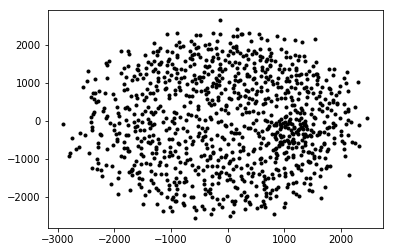

In [45]:
plt.scatter(mds[:,0], mds[:,1], marker='.', color='black')

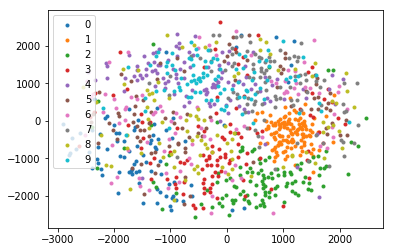

In [46]:
for label in set(Y):
	mask = Y==label
	plt.scatter(mds[:,0][mask], mds[:,1][mask], marker = '.', label = label)   #, color =  label + 1) #, label = str(label))
plt.legend()

# UMAP

In [47]:
umap_c = umap.UMAP(n_components=2).fit_transform(X)

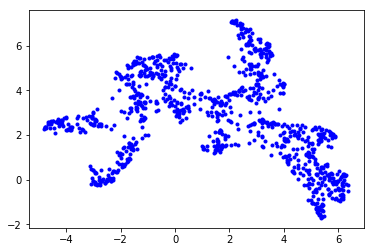

In [48]:
plt.scatter(umap_c[:,0], umap_c[:,1], marker='.', color='blue')

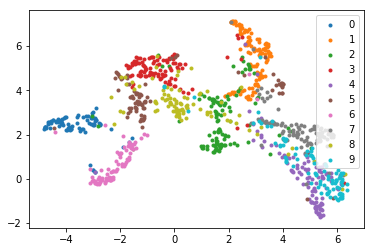

In [49]:
for label in set(Y):
	mask = Y==label
	plt.scatter(umap_c[:,0][mask], umap_c[:,1][mask], marker = '.', label = label)   #, color =  label + 1) #, label = str(label))
plt.legend()

# Autoencoder NN

In [50]:
pass

# K-Means

In [51]:
clusters = KMeans(n_clusters=10).fit_predict(X)

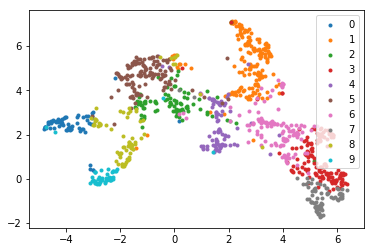

In [52]:
for label in set(clusters):
	mask = clusters==label
	plt.scatter(umap_c[:,0][mask], umap_c[:,1][mask], marker = '.', label = label)   #, color =  label + 1) #, label = str(label))
plt.legend()

# Hierarchical Clustering

In [53]:
clusters = AgglomerativeClustering(n_clusters=10).fit_predict(X)

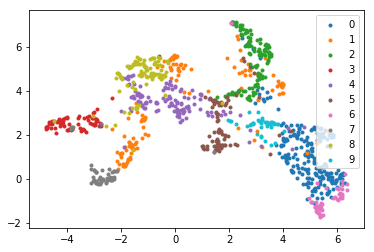

In [54]:
for label in set(clusters):
	mask = clusters==label
	plt.scatter(umap_c[:,0][mask], umap_c[:,1][mask], marker = '.', label = label)   #, color =  label + 1) #, label = str(label))
plt.legend()

# Please leave the @feedback